# **THE SPARKS FOUNDATION**

IoT & Computer Vision (GRIP June'21)

**Author: Shubh Patel** 

Task 1: Object Detection

In [1]:
from keras.datasets import cifar10
from keras.utils import np_utils
from matplotlib import pyplot as plt
import numpy as np
from PIL import Image

In [2]:
import sys
import keras
print('Keras: {}'.format(keras.__version__))

Keras: 2.5.0


In [3]:
#loading data
(X_train,y_train),(X_test,y_test)=cifar10.load_data()

170508288/170498071 [==============================] - 3s 0us/step


In [4]:
#Data exploration
print('Training images: {}'.format(X_train.shape))
print('Testing images: {}'.format(X_test.shape))

Training images: (50000, 32, 32, 3)
Testing images: (10000, 32, 32, 3)


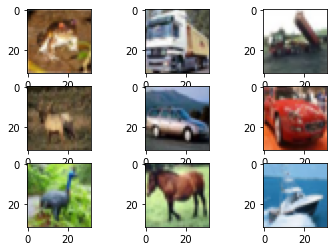

In [5]:
#create a grid of 3x3 images
for i in range(0,9):
    plt.subplot(330+ 1 +i)
    
    plt.imshow(X_train[i])
    
plt.show()

In [6]:
#Prepocessing
seed=6
np.random.seed(seed)

(X_train,y_train),(X_test,y_test)=cifar10.load_data()

#normalising inputs to 0.0 to 1.0 from 0-255
X_train=X_train.astype('float32')
X_test=X_test.astype('float32')

X_train=X_train/255.0
X_test=X_test/255.0

In [7]:
print(X_train[0])


[[[0.23137255 0.24313726 0.24705882]
  [0.16862746 0.18039216 0.1764706 ]
  [0.19607843 0.1882353  0.16862746]
  ...
  [0.61960787 0.5176471  0.42352942]
  [0.59607846 0.49019608 0.4       ]
  [0.5803922  0.4862745  0.40392157]]

 [[0.0627451  0.07843138 0.07843138]
  [0.         0.         0.        ]
  [0.07058824 0.03137255 0.        ]
  ...
  [0.48235294 0.34509805 0.21568628]
  [0.46666667 0.3254902  0.19607843]
  [0.47843137 0.34117648 0.22352941]]

 [[0.09803922 0.09411765 0.08235294]
  [0.0627451  0.02745098 0.        ]
  [0.19215687 0.10588235 0.03137255]
  ...
  [0.4627451  0.32941177 0.19607843]
  [0.47058824 0.32941177 0.19607843]
  [0.42745098 0.28627452 0.16470589]]

 ...

 [[0.8156863  0.6666667  0.3764706 ]
  [0.7882353  0.6        0.13333334]
  [0.7764706  0.6313726  0.10196079]
  ...
  [0.627451   0.52156866 0.27450982]
  [0.21960784 0.12156863 0.02745098]
  [0.20784314 0.13333334 0.07843138]]

 [[0.7058824  0.54509807 0.3764706 ]
  [0.6784314  0.48235294 0.16470589]


In [8]:
#class labels exploration- 10 categories

print(y_train.shape)
print(y_train[0])

(50000, 1)
[6]


In [9]:
#one hot encoding the categories

y_train=np_utils.to_categorical(y_train)
y_test=np_utils.to_categorical(y_test)

num_class=y_test.shape[1]

print(num_class)
print(y_train.shape)
print(y_train[0])

10
(50000, 10)
[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]


In [10]:
#Building the All CNN model referring to the paper

from keras.models import Sequential
from keras.layers import Dropout, Activation, Conv2D, GlobalAveragePooling2D
from keras.optimizers import SGD

In [11]:
#defining the model function

def allcnn(weights=None):
    model=Sequential()
    #add model layers
    model.add(Conv2D(96,(3,3),padding='same',input_shape=(32,32,3)))
    model.add(Activation('relu'))
    model.add(Conv2D(96,(3,3),padding='same'))
    model.add(Activation('relu'))
    model.add(Conv2D(96,(3,3),padding='same',strides=(2,2)))
    model.add(Dropout(0.5))
    
    model.add(Conv2D(192,(3,3),padding='same'))
    model.add(Activation('relu'))
    model.add(Conv2D(192,(3,3),padding='same'))
    model.add(Activation('relu'))
    model.add(Conv2D(192,(3,3),padding='same',strides=(2,2)))
    model.add(Dropout(0.5))
    
    model.add(Conv2D(192,(3,3),padding='same'))
    model.add(Activation('relu'))
    model.add(Conv2D(192,(1,1),padding='valid'))
    model.add(Activation('relu'))
    model.add(Conv2D(10,(1,1),padding='valid'))
    
    #Softmax activation
    
    model.add(GlobalAveragePooling2D())
    model.add(Activation('softmax'))
    
    #load the weights
    
    if weights:
        model.load_weights(weights)
    
    return model

In [12]:
#define hyper parameters
learning_rate=0.01
weight_decay=1e-6
momentum=0.9

#build model (hopefully)

model=allcnn()

#define optimizer and compile model

sgd=SGD(lr=learning_rate,decay=weight_decay,momentum=momentum,nesterov=True)
model.compile(loss='categorical_crossentropy',optimizer=sgd,metrics=['accuracy'])

print(model.summary())

#additional training params

epochs =9
batch_size=32

#fit model
model.fit(X_train,y_train,validation_data=(X_test, y_test), epochs=epochs,batch_size=batch_size,verbose=1)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 96)        2688      
_________________________________________________________________
activation (Activation)      (None, 32, 32, 96)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 96)        83040     
_________________________________________________________________
activation_1 (Activation)    (None, 32, 32, 96)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 96)        83040     
_________________________________________________________________
dropout (Dropout)            (None, 16, 16, 96)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 16, 16, 192)       1

KeyboardInterrupt: ignored

In [13]:
classes=range(0,10)

names=['airplane','auto','bird','cat','deer','dog','frog','horse','ship','truck']

class_labels=dict(zip(classes,names))
print(class_labels)

{0: 'airplane', 1: 'auto', 2: 'bird', 3: 'cat', 4: 'deer', 5: 'dog', 6: 'frog', 7: 'horse', 8: 'ship', 9: 'truck'}


In [14]:
#generating batches for predictions
batch=X_test[100:109] #9 images
labels=np.argmax(y_test[100:109],axis=-1)

predictions=model.predict(batch,verbose=1)

1/1 [==============================] - 1s 824ms/step


In [15]:
print(predictions)


[[1.25451628e-02 2.73739395e-04 1.31760165e-01 7.73445219e-02
  4.26428169e-01 9.75637138e-02 5.64148091e-03 2.42598444e-01
  4.24824003e-03 1.59638119e-03]
 [9.32539161e-03 9.04451683e-03 3.50072980e-02 3.99755776e-01
  4.41345721e-02 3.58912408e-01 6.39024451e-02 4.80794087e-02
  4.76189237e-03 2.70763803e-02]
 [2.04615062e-03 1.66423933e-03 1.03201218e-01 3.43096644e-01
  1.63278822e-02 4.33426082e-01 7.22836470e-03 7.63882175e-02
  2.84793135e-03 1.37732765e-02]
 [2.54949206e-03 5.60276443e-04 1.82298154e-01 4.47974592e-01
  3.94043885e-02 2.66205817e-01 1.49986548e-02 3.88522670e-02
  2.62253406e-03 4.53381194e-03]
 [1.81022622e-02 4.12216872e-01 1.32715941e-04 3.44272761e-04
  6.46927947e-05 5.99083069e-05 7.02425968e-05 5.20068679e-05
  1.96775403e-02 5.49279511e-01]
 [6.92084577e-05 9.71204758e-01 6.74941747e-09 6.22756673e-08
  1.13472352e-08 6.31924202e-09 3.59239127e-09 9.67805280e-10
  1.00779565e-04 2.86251698e-02]
 [7.05582574e-02 7.74922296e-02 1.38065934e-01 1.78386286e

In [16]:
for image in predictions:
    print(np.sum(image))

1.0
1.0000001
0.99999994
1.0
1.0
1.0
0.99999994
1.0000001
1.0000001


In [17]:
class_result=np.argmax(predictions, axis=1)
print(class_result)

[4 3 5 3 9 1 8 6 5]


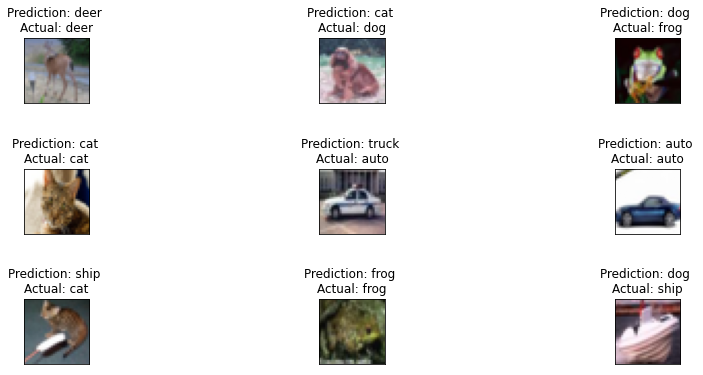

In [18]:
#Show results
fig,axs=plt.subplots(3,3, figsize=(15,6))
fig.subplots_adjust(hspace=1)
axs=axs.flatten()

for i, img in enumerate(batch):
    for key,value in class_labels.items():
        if(class_result[i]==key):
            title='Prediction: {} \nActual: {}'.format(class_labels[key],class_labels[labels[i]])
            axs[i].set_title(title)
            axs[i].axes.get_xaxis().set_visible(False)
            axs[i].axes.get_yaxis().set_visible(False)
    
    axs[i].imshow(img)
    
plt.show()